In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_coles = pd.read_csv('/Users/34633/avdata/truco-o-dato/data/data_aprobados_colegio_barrio.csv', sep=';')

df_coles_bcn = df_coles[df_coles['Municipi']=='BARCELONA']

df_coles_bcn.head()

,Curs,Estudi,Codi àrea territorial,Àrea territorial,Codi comarca,Comarca,Codi municipi,Municipi,Codi districte,Districte,Naturalesa,Titularitat,Nivell,Sexe,Concert,Resultat,Alumnes avaluats
0,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN AMB PENDENTS,1
1,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN SENSE PENDENTS,13
2,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN AMB PENDENTS,3
3,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN SENSE PENDENTS,14
4,2023/2024,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,CIUTAT VELLA,PRIVAT,FUNDACIONS,2,DONA,SI,PROMOCIONEN AMB PENDENTS,3


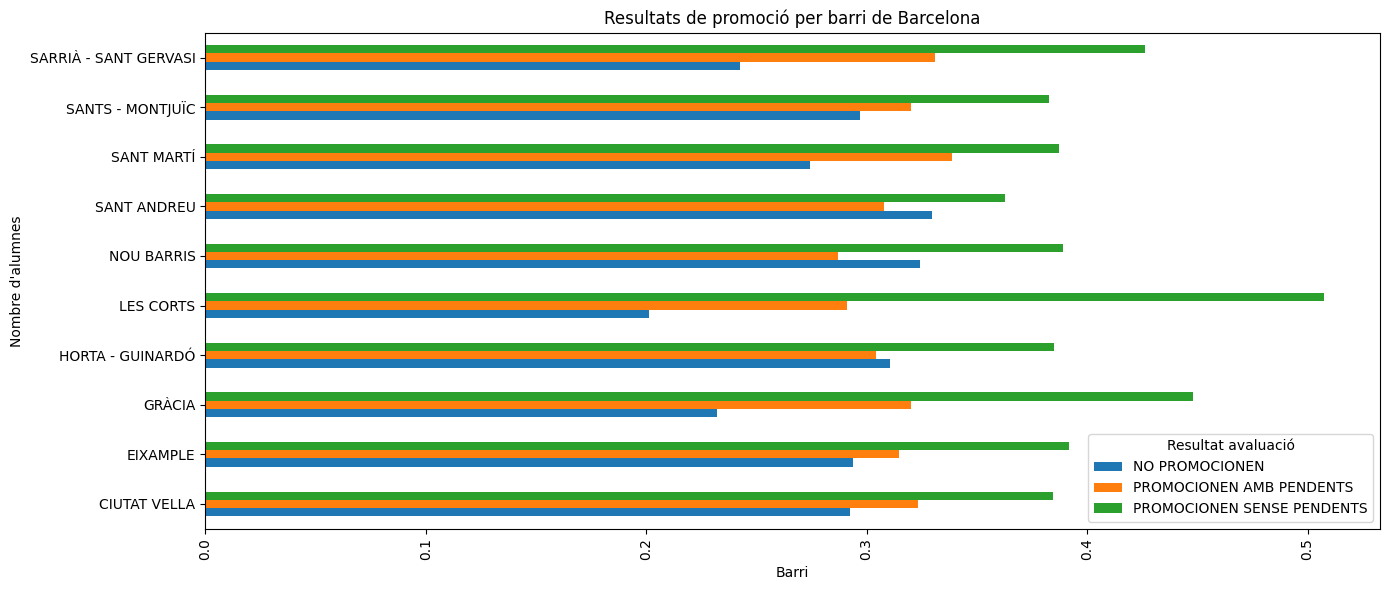

In [7]:
df_counts = df_coles_bcn.groupby(['Districte', 'Resultat']).size().unstack(fill_value=0)
df_norm = df_counts.div(df_counts.sum(axis=1), axis=0) #per normalitzar

df_norm.plot(kind='barh', figsize=(14, 6))
plt.title("Resultats de promoció per barri de Barcelona")
plt.xlabel("Barri")
plt.ylabel("Nombre d'alumnes")
plt.xticks(rotation=90)
plt.legend(title="Resultat avaluació")
plt.tight_layout()
plt.show()



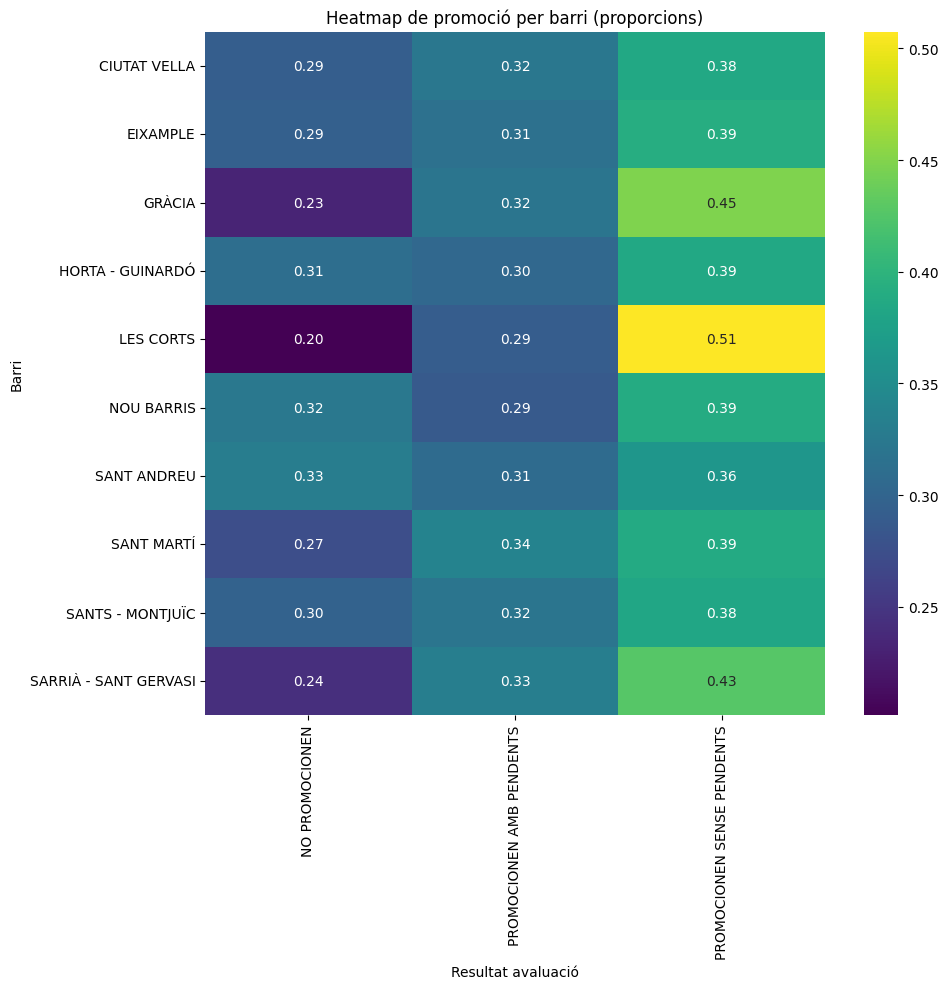

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df_norm, cmap='viridis', annot=True, fmt=".2f")

plt.title("Heatmap de promoció per barri (proporcions)")
plt.xlabel("Resultat avaluació")
plt.ylabel("Barri")
plt.tight_layout()
plt.show()

In [9]:
import geopandas as gpd
geobarris_df =  gpd.read_file('/Users/34633/avdata/truco-o-dato/data/BarcelonaCiutat_Barris.csv')
df_norm_map = df_norm[['S']].reset_index()
gdf_map = gdf_barris.merge(df_norm_map, left_on='nom_barri', right_on='Districte')
fig, ax = plt.subplots(figsize=(10,10))
gdf_map.plot(column='PROMOCIONEN AMB PENDENT',cmap='Reds',linewidth=0.5,edgecolor='black',legend=True,legend_kwds={'label': "Proporció que proporciona amb pendents"}, ax=ax)

plt.title("Percentatge d’alumnes que promocionen amb pendents per barri de Barcelona")
plt.axis('off')
plt.show()

KeyError: "None of [Index(['S'], dtype='object', name='Resultat')] are in the [columns]"

In [ ]:
import json

input_file = "BarcelonaCiutat_Districtes.json"      # your source JSON file
output_file = "barcelonabarris.geojson" # resulting GeoJSON file

with open(input_file, "r") as f:
    data = json.load(f)

# ---- Convert to GeoJSON ----
features = []

for item in data:
    # adjust field names if needed
    lat = item["latitude"]
    lon = item["longitude"]

    feature = {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [lon, lat]   # GeoJSON uses [lon, lat]
        },
        "properties": {
            k: v for k, v in item.items() if k not in ["latitude", "longitude"]
        }
    }

    features.append(feature)

geojson = {
    "type": "FeatureCollection",
    "features": features
}

# ---- Save GeoJSON ----
with open(output_file, "w") as f:
    json.dump(geojson, f, indent=2)

print("GeoJSON saved to", output_file)


In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

file_path = "BarcelonaCiutat_Districtes.json" 

districts = gpd.read_file(file_path)

print("First 5 rows:")
print(districts.head())

print("\nColumns:")
print(districts.columns)

print("\nCoordinate Reference System (CRS):")
print(districts.crs)

# 4️⃣ Quick plot of the map
plt.figure(figsize=(10, 10))
districts.plot(edgecolor="black", cmap="tab20")
plt.title("Barcelona Districts", fontsize=16)
plt.axis("off")
plt.show()

# 5️⃣ Optional: Save cleaned GeoJSON
districts.to_file("barcelona_districts_clean.geojson", driver="GeoJSON")

# 6️⃣ Optional: Save as Shapefile
# districts.to_file("barcelona_districts.shp")


DataSourceError: BarcelonaCiutat_Districtes.json: No such file or directory